In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train (1).csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [11]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [12]:
x_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [14]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values


In [16]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([26.  , 47.  , 29.  , 25.  ,  2.  ,  9.  , 36.  ,  4.  , 54.  ,
       23.  , 25.  , 30.  , 35.  , 38.  , 22.  , 27.  , 34.  , 17.  ,
       22.  ,  7.  , 27.  , 25.  , 62.  , 34.  , 28.5 , 16.  , 41.  ,
       33.  ,  9.  , 28.  , 60.  ,  4.  , 30.  , 19.  , 16.  , 22.  ,
       45.  , 15.  , 38.  , 19.  , 19.  , 18.  , 28.  , 29.  , 29.  ,
       36.  , 33.  , 24.  , 50.  , 33.  , 36.  , 36.  , 27.  , 44.  ,
       31.  , 45.  ,  2.  , 26.  , 28.5 , 36.  , 62.  , 42.  , 36.  ,
       16.  , 30.  , 24.  , 26.  , 32.  , 26.  , 22.  , 27.  ,  0.42,
       52.  , 18.  , 39.  , 22.  , 32.  ,  1.  , 25.  , 27.  ,  3.  ,
       18.  , 28.  , 30.  , 22.  , 29.  , 64.  , 32.5 , 25.  , 70.  ,
       16.  , 30.  , 25.  , 22.  , 28.  , 39.  , 16.  , 22.  , 37.  ,
       31.  ,  5.  , 24.  , 24.  , 26.  , 30.  , 18.  , 21.  , 18.  ,
       40.  , 14.5 , 36.  , 21.  , 41.  , 30.  ,  4.  , 40.5 , 24.  ,
       24.  , 51.  , 47.  , 20.  , 19.  , 45.  , 49.  , 16.  , 30.  ,
       21.  , 29.  ,

In [17]:
x_train['Age'].isnull().sum()

148

In [18]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,62.0
493,71.0,49.5042,71.0
527,NaN,221.7792,35.0


C:\Users\SUKANTA SAI\AppData\Local\Temp\ipykernel_14372\3070442571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\SUKANTA SAI\AppData\Local\Temp\ipykernel_14372\3070442571.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

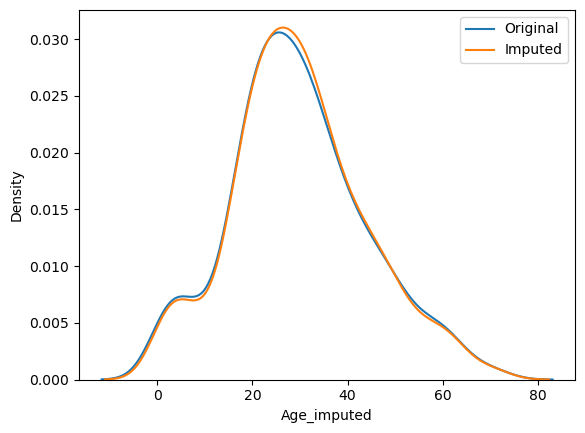

In [21]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [22]:
print('Original variable variance: ',x_train['Age'].var())
print('Variance after random imputation: ',x_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  198.51748205881876


In [23]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,62.706133
Age,71.512440,204.349513,204.349513
Age_imputed,62.706133,204.349513,198.517482


<Axes: >

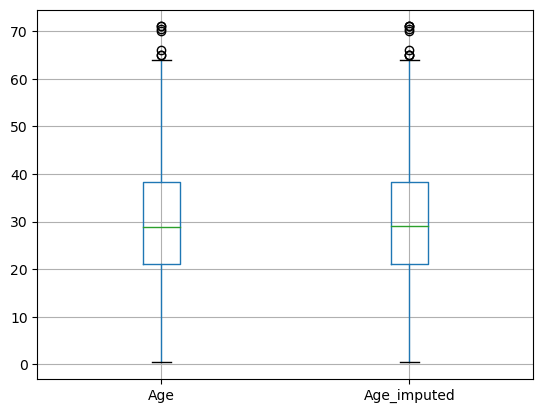

In [24]:
x_train[['Age','Age_imputed']].boxplot()

In [31]:
sampled_value = x_train ['Age'].dropna().sample (1, random_state=int(observation['Fare']))


NameError: name 'observation' is not defined

In [32]:
data=pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [33]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [34]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [35]:
x=data
y=data['SalePrice']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [41]:
x_train['GarageQual_imputed']=x_train['GarageQual']
x_test['GarageQual_imputed']=x_test['GarageQual']
x_train['FireplaceQu_imputed']=x_train['FireplaceQu']
x_test['FireplaceQu_imputed']=x_test['FireplaceQu']

In [42]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,Fireplace_imputed,FireplaceQu_imputed
172,TA,Gd,239000,Gd,TA,TA
1213,NaN,TA,145000,TA,NaN,NaN
1020,NaN,TA,176000,TA,NaN,NaN
111,TA,TA,180000,TA,TA,TA
644,Gd,TA,370878,TA,Gd,Gd


In [43]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

C:\Users\SUKANTA SAI\AppData\Local\Temp\ipykernel_14372\4277669966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
C:\Users\SUKANTA SAI\AppData\Local\Temp\ipykernel_14372\4277669966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values
C:\Users\SUKANTA SAI\AppData\Local\Temp\ipykernel_14372\4277669966.py:4: SettingW

In [46]:
temp=pd.concat([
    x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
    x_train['GarageQual_imputed'].value_counts()/len(x_train)
],
    axis=1)
temp.columns=['original','imputed']

In [47]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035103
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.001712


In [48]:
temp=pd.concat([
    
    x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
    x_train['FireplaceQu_imputed'].value_counts()/len(df)
],axis=1)
temp.columns=['original','imputed']
temp

,original,imputed
Gd,0.494272,0.645342
TA,0.412439,0.545455
Fa,0.040917,0.054994
Po,0.027823,0.037037
Ex,0.024550,0.028058


C:\Users\SUKANTA SAI\AppData\Local\Temp\ipykernel_14372\2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\SUKANTA SAI\AppData\Local\Temp\ipykernel_14372\2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

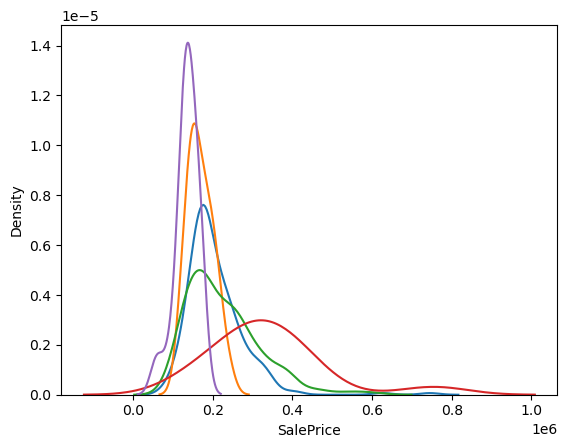

In [54]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\SUKANTA SAI\AppData\Local\Temp\ipykernel_14372\484091634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\SUKANTA SAI\AppData\Local\Temp\ipykernel_14372\484091634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom

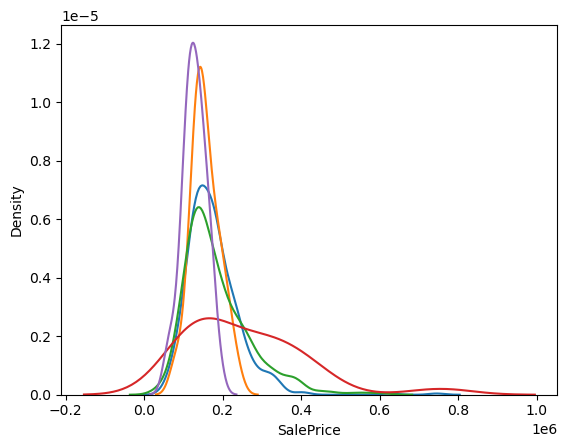

In [55]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()